In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [18]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [19]:
img_width = 180
img_height = 180

In [20]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split= False)


Found 3115 files belonging to 36 classes.


In [21]:
data_cat = data_train.class_names

In [22]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,image_size=(img_height,img_width),batch_size=32,shuffle=False,validation_split=False)

Found 351 files belonging to 36 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,image_size=(img_height,img_width),shuffle=False,batch_size=32,validation_split=False)

Found 359 files belonging to 36 classes.


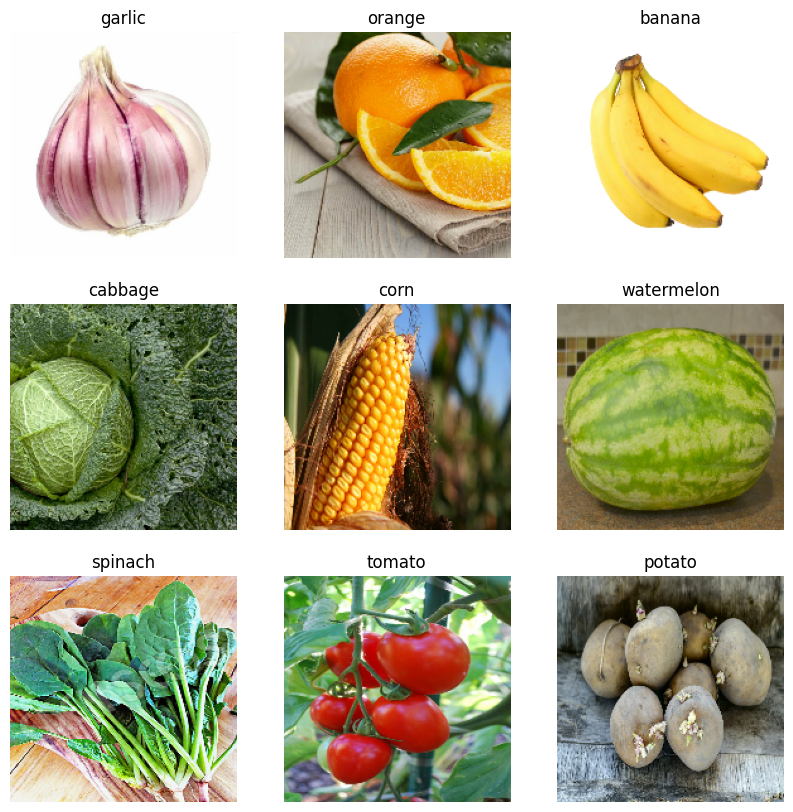

In [23]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [29]:
model  = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

    
    ])


In [30]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [31]:
epochs_size= 25
history = model.fit(data_train, validation_data = data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.0932 - loss: 3.4037 - val_accuracy: 0.4245 - val_loss: 2.1824
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 899ms/step - accuracy: 0.3541 - loss: 2.2478 - val_accuracy: 0.6752 - val_loss: 1.2998
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 878ms/step - accuracy: 0.5369 - loss: 1.6346 - val_accuracy: 0.8490 - val_loss: 0.6892
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 4577s 47s/step - accuracy: 0.6819 - loss: 1.0961 - val_accuracy: 0.8946 - val_loss: 0.5100
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 759ms/step - accuracy: 0.8365 - loss: 0.5872 - val_accuracy: 0.9430 - val_loss: 0.2955
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 662ms/step - accuracy: 0.9266 - loss: 0.2772 - val_accuracy: 0.9487 - val_loss: 0.4206
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 655ms/step - accuracy: 0.9501 - loss: 0.2059 - val_accuracy: 0.9658 - val_loss: 0.2882
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 748ms/step - accuracy: 0.9708 - loss: 0.1320 - val_accu

In [32]:
model.save("Image_classification_vegitable_fruit.keras")